This notebook documents the only correct and complete solution so far to the Round 2 problem:

> Dynamics of a Heated Tank with Proportional–Integral (PI) Temperature Control

The solution was developed by **Karthik Mahadevan**, whose approach stands out for its clarity, mathematical consistency, and faithful treatment of both process dynamics and control logic. The work carefully integrates physical modeling with control-theoretic reasoning, leading to a result that is not just numerically correct, but conceptually sound.

The complete solution and implementation are solely credited to Karthik.

## Problem Origin & Attribution

This problem is adapted from a classic numerical benchmark in chemical engineering education and computation, drawn from:

**A Collection of 10 Numerical Problems in Chemical Engineering**\
by *Michael B. Cutlip, John J. Hwalek, H. Eric Nuttall, Mordechai Shacham, Joseph Brule, John Widmann, Tae Han, Bruce Finlayson, Edward M. Rosen, and Ross Taylor.*

The original collection is well-known for blending first-principles modeling, numerical methods, and software-based solution strategies, making it an ideal fit for the Codathon philosophy.

## Solution


In [1]:
import numpy as np
import scipy.optimize as scopt
import scipy.integrate as scint
import matplotlib.pyplot as plt

In [2]:
dens_term = 4000
Wcp = 500
Tis = 60
dead_time = 1 # min
kc = 50
tau_i = 2
Tr = 80
tau_m = 5

In [3]:
# Q needs to be calculated at steady state
qis = Wcp*(Tr-Tis)

In [4]:
def Ti(step=0):
    return Tis + step

In [5]:
def closed_loop_simulation(t,S,k,tau,step=0):
    T,To,Tm,I = S
    error = (Tr-Tm)
    dI_dt = error
    q = qis + k*error + k/tau*I
    dT_dt = (Wcp*(Ti(step)-T)+q)/dens_term
    if t<dead_time:
        dTo_dt = 0
    else:
        dTo_dt = (T-To-dead_time*0.5*dT_dt)*2/dead_time # Pade approximation
    # Must do this otherwise Pade approximation would fail before t < dead time
    dTm_dt = (To-Tm)/tau_m
    dS_dt = [dT_dt,dTo_dt,dTm_dt,dI_dt]
    return dS_dt

In [6]:
# Guys, I am making a small change for convenience (I am assuming Ti is changing at t=0min)
# This is subquestion 1
ic = [Tr,Tr,Tr,0] # Initial conditions
t_span = [0,60]
t_eval = np.linspace(0,60,10001)
solution1= scint.solve_ivp(closed_loop_simulation,t_span,ic,t_eval=t_eval,method="LSODA",args=(0,tau_i,-20))

In [7]:
T,To,Tm,_ = solution1.y

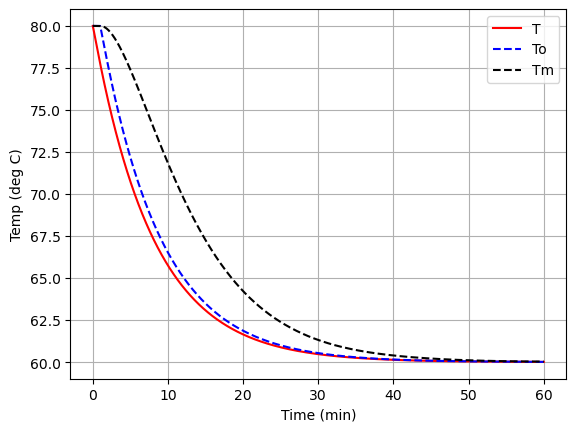

In [8]:
plt.plot(solution1.t,T,label = 'T',color = 'r')
plt.plot(solution1.t,To,'--',label = 'To',color = 'b')
plt.plot(solution1.t,Tm,'--',label = 'Tm',color ='k' )
plt.xlabel('Time (min)')
plt.ylabel('Temp (deg C)')
plt.legend()
plt.grid();

The Pade approximation doesn't work well for $t < \tau_d $, but it works well if I tweek it with an if :)

In [9]:
# For subquestion 2
# Guys pls run this part everytime as variable names in all subparts are the same
t_span = [0,200]
t_eval = np.linspace(0,200,20001)
solution2 = scint.solve_ivp(closed_loop_simulation,t_span,ic,t_eval=t_eval,method="LSODA",args=(kc,tau_i,-20))

In [10]:
T,To,Tm,_ = solution2.y

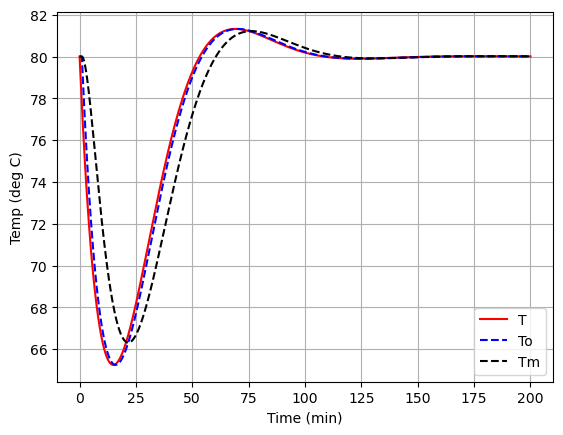

In [11]:
plt.plot(solution2.t,T,label = 'T',color = 'r')
plt.plot(solution2.t,To,'--',label = 'To',color = 'b')
plt.plot(solution2.t,Tm,'--',label = 'Tm',color ='k' )
plt.xlabel('Time (min)')
plt.ylabel('Temp (deg C)')
plt.legend()
plt.grid();

In [12]:
# Subquestion 3
t_span = [0,100]
t_eval = np.linspace(0,100,10001)
solution3 = scint.solve_ivp(closed_loop_simulation,t_span,ic,t_eval=t_eval,method="LSODA",args=(500,tau_i,-20))

In [13]:
T,To,Tm,_ = solution3.y

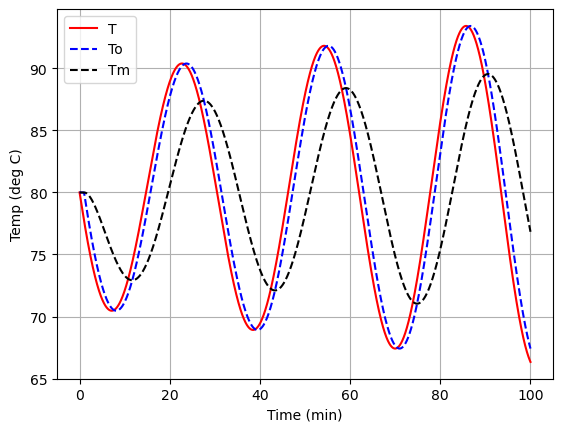

In [14]:
plt.plot(solution3.t,T,label = 'T',color = 'r')
plt.plot(solution3.t,To,'--',label = 'To',color = 'b')
plt.plot(solution3.t,Tm,'--',label = 'Tm',color ='k' )
plt.xlabel('Time (min)')
plt.ylabel('Temp (deg C)')
plt.legend()
plt.grid();

$K_c$ value is so high that the system has become unstable !!

In [15]:
# Subquestion 4
# The way I have coded it, I can't make kc/tau_i = 0 so instead I will take tau_i  as a very huge number !!!
t_span = [0,75]
t_eval = np.linspace(0,75,10001)
solution4 = scint.solve_ivp(closed_loop_simulation,t_span,ic,t_eval=t_eval,method="LSODA",args=(500,1e+12,-20))

In [16]:
T,To,Tm,_ = solution4.y

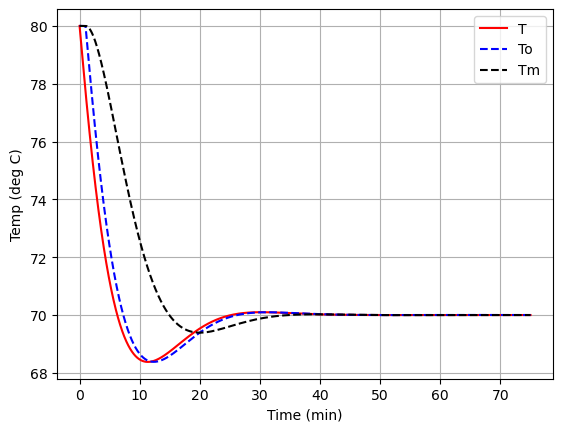

In [17]:
plt.plot(solution4.t,T,label = 'T',color = 'r')
plt.plot(solution4.t,To,'--',label = 'To',color = 'b')
plt.plot(solution4.t,Tm,'--',label = 'Tm',color ='k' )
plt.xlabel('Time (min)')
plt.ylabel('Temp (deg C)')
plt.legend()
plt.grid();

With a gain of $k_c = 500 $, and only P mode on, the system is not unstable! However we don't reach set point and there is a permanent offset :(

In [18]:
# Subquestion 5
def closed_loop_simulation(t,S,k,tau,step=0):
    T,To,Tm,I = S
    error = (90-Tm) # Have changed setpoint
    dI_dt = error
    q = qis + k*error + k/tau*I
    dT_dt = (Wcp*(Ti(step)-T)+q)/dens_term
    if t<dead_time:
        dTo_dt = 0
    else:
        dTo_dt = (T-To-dead_time*0.5*dT_dt)*2/dead_time # Pade approximation
    # Must do this otherwise Pade approximation would fail before t < dead time
    dTm_dt = (To-Tm)/tau_m
    dS_dt = [dT_dt,dTo_dt,dTm_dt,dI_dt]
    return dS_dt

def closed_loop_simulation_with_limits(t,S,k,tau,step=0):
    T,To,Tm,I = S
    error = (90-Tm) # Setpoint is changed
    dI_dt = error
    q = qis + k*error + k/tau*I
    if q<0:
        q=0
    if q>2.6*qis:
        q = 2.6*qis
    dT_dt = (Wcp*(Ti(step)-T)+q)/dens_term
    if t<dead_time:
        dTo_dt = 0
    else:
        dTo_dt = (T-To-dead_time*0.5*dT_dt)*2/dead_time # Pade approximation
    # Must do this otherwise Pade approximation would fail before t < dead time
    dTm_dt = (To-Tm)/tau_m
    dS_dt = [dT_dt,dTo_dt,dTm_dt,dI_dt]
    return dS_dt

In [19]:
t_span = [0,250]
t_eval = np.linspace(0,250,20001)
solution51 = scint.solve_ivp(closed_loop_simulation_with_limits,t_span,ic,t_eval=t_eval,method="LSODA",args=(5000,1e+12,0))
solution52 = scint.solve_ivp(closed_loop_simulation,t_span,ic,t_eval=t_eval,method="LSODA",args=(5000,1e+12,0))

In [20]:
Tl,Tol,Tml,Il = solution51.y
T,To,Tm,I = solution52.y

In [21]:
ql = qis + 5000*(90-Tml)
q = qis + 5000*(90-Tm)

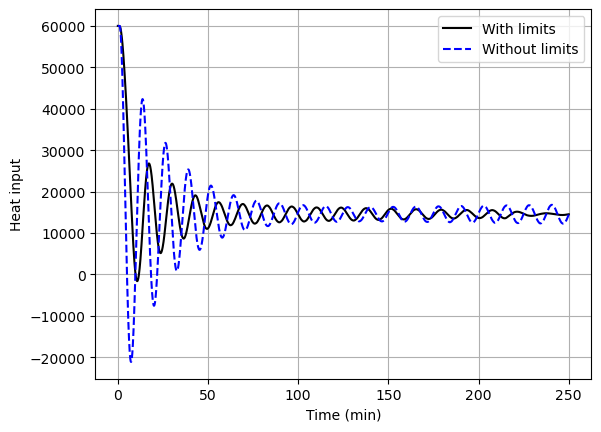

In [22]:
plt.plot(solution51.t,ql,color = 'k',label = 'With limits')
plt.plot(solution52.t,q,'--',color = 'b',label = 'Without limits')
plt.grid()
plt.legend()
plt.xlabel('Time (min)')
plt.ylabel('Heat input');

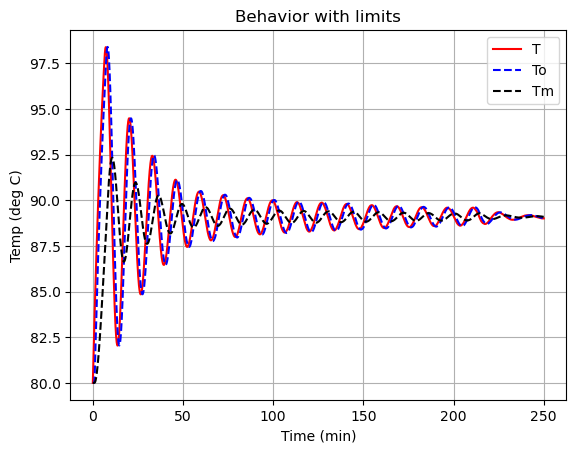

In [23]:
# With limits
plt.plot(solution51.t,Tl,label = 'T',color = 'r')
plt.plot(solution51.t,Tol,'--',label = 'To',color = 'b')
plt.plot(solution51.t,Tml,'--',label = 'Tm',color ='k' )
plt.xlabel('Time (min)')
plt.ylabel('Temp (deg C)')
plt.legend()
plt.title('Behavior with limits')
plt.grid();